# load and prepare data

In [3]:
#import libs
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import pandas as pd


In [7]:
#dataset

boston = load_boston()
features_train, features_test, labels_train, labels_test = train_test_split(boston.data, boston.target, 
                                                                            test_size=0.4, random_state=0)



In [11]:
#split data
features_train = pd.DataFrame(features_train, columns = boston.feature_names)
features_test = pd.DataFrame(features_test, columns = boston.feature_names)
# Select rooms column for univariate regression example
features_train = features_train.iloc[:, 5]
features_test = features_test.iloc[:, 5]

labels_train = pd.DataFrame(labels_train, columns = ['Price'])
labels_test = pd.DataFrame(labels_test, columns = ['Price'])

# Plot data

Text(0, 0.5, 'Labels')

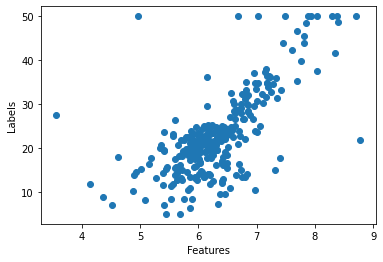

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(features_train, labels_train)
plt.xlabel("Features")
plt.ylabel("Labels")

# Train KNN model with varying weights

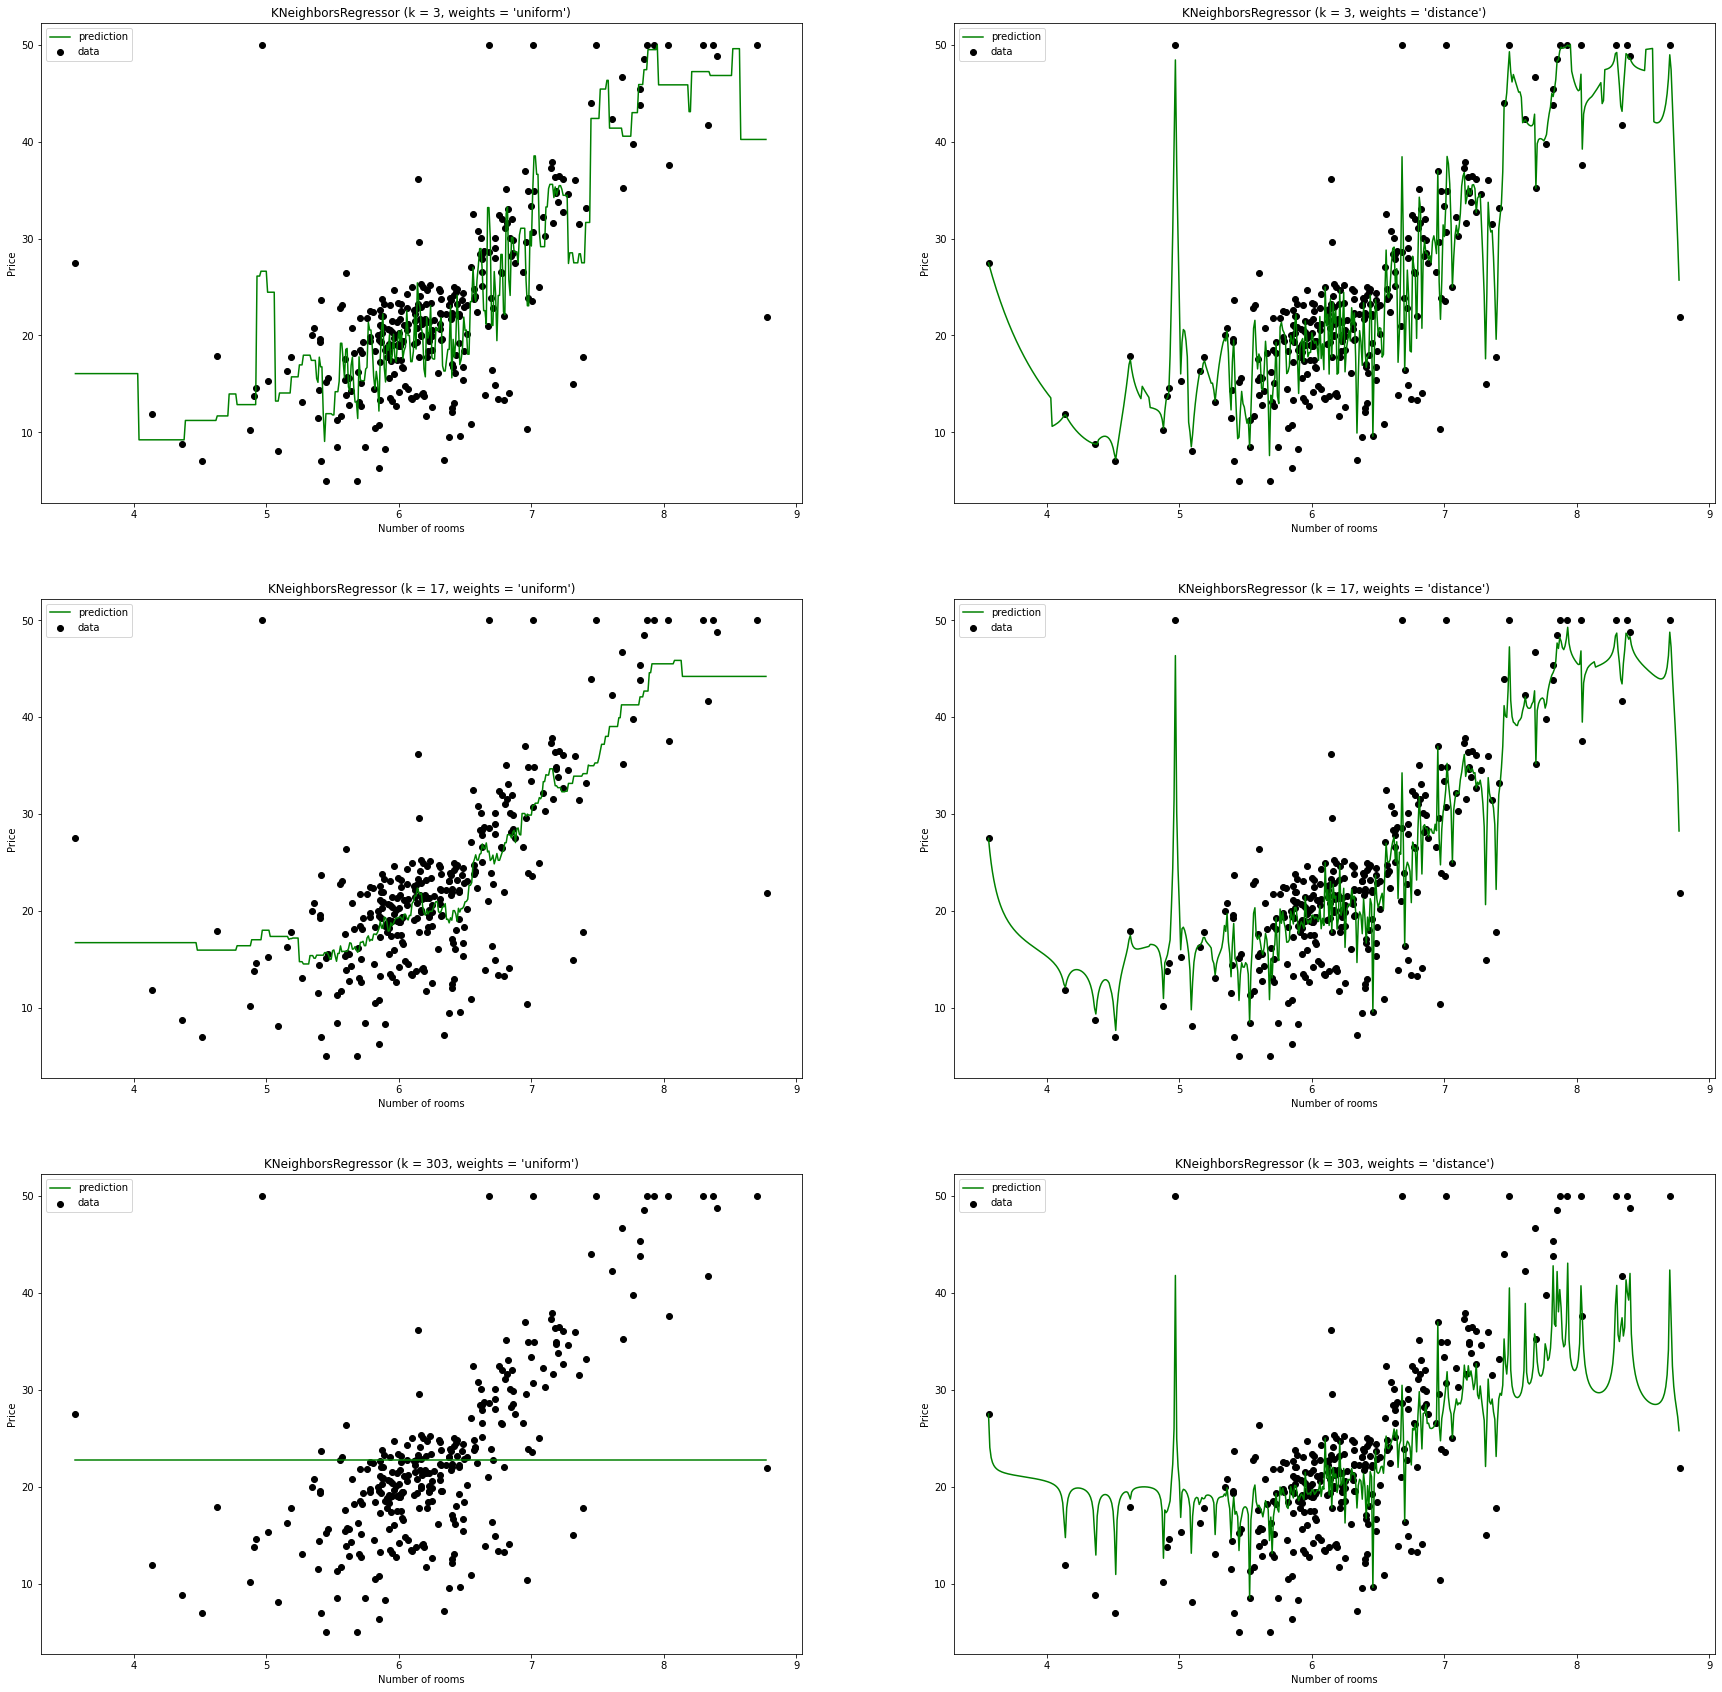

In [19]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

n = features_train.shape[0]
params = [{'weights': 'uniform', 'n_neighbors': 3},
          {'weights': 'distance', 'n_neighbors': 3},
          {'weights': 'uniform', 'n_neighbors': np.sqrt(n).astype(int)},
          {'weights': 'distance', 'n_neighbors': np.sqrt(n).astype(int)},
          {'weights': 'uniform', 'n_neighbors': n},
          {'weights': 'distance', 'n_neighbors': n}]

plot_range = np.arange(min(features_train), max(features_train), 0.01)

for i, param in enumerate(params):
    model = KNeighborsRegressor(**params[i])
    model.fit(features_train.values.reshape(-1, 1), labels_train)

    pred = model.predict(plot_range.reshape(-1, 1))
    # Sort values for plotting
    new_X, new_y = zip(*sorted(zip(plot_range.reshape(-1, 1), pred))) 
    plt.subplot(3, 2, i + 1)
    plt.scatter(features_train.values.reshape(-1, 1), labels_train, c='k', label='data')
    plt.plot(new_X, new_y, c='g', label='prediction')    
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (params[i]['n_neighbors'], params[i]['weights']))
    plt.ylabel('Price')
    plt.xlabel('Number of rooms')

plt.rcParams["figure.figsize"] = [35, 35]
    
plt.show()